#### Загрузка данных, получение общей информации

In [2]:
data = pd.read_csv('...') # загрузил данные

In [3]:
data.info() # вывел общую информацию
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Данные содержат 16 715 записей. Таблица имееет некорректное наименование столбцов (нужно привести к нижнему регистру). Есть пропуски в Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Следует изменить тип данных в Year_of_Release, User_Score, проверить наличие дубликатов.**

#### Подготовка данных

In [4]:
data.columns = data.columns.str.lower() # привел наименования столбцов к нижнему регистру
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.duplicated().sum() # полных дубликатов нет

0

In [6]:
# есть дубликат игры Madden NFL 13 для PS3, а также игры 1993 года без имени для GEN
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [7]:
data.drop(16230, inplace=True) # удалил дубликат Madden NFL 13 для PS3 по индексу 16230 (так как нет информации о продажах)

In [8]:
data[data['name'].isna()] # вывел пропуски в name и в genre, эти же строки - дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data.dropna(subset=['name'], inplace=True) # удалил строки с пропусками в name, genre и заодно дубликаты
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
data['year_of_release'] = data['year_of_release'].astype(float).astype('Int64') # привел year_of_release к int

In [11]:
# часть наименований игр содержит год выпуска, это можно использовать для восстановления пропусков в year_of_release
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data = data.dropna(subset = ['year_of_release']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [14]:
# проверил, что получилось
#data.query('name == @names')['year_of_release'].isna().sum() # можно посмотреть всю выборку: data.query('name == @names')

In [15]:
data['critic_score'].unique() # все записи (кроме пропусков) в critic_score содержат целочисленные значения

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
data['critic_score'] = data['critic_score'].astype(float).astype('Int64') # привел critic_score к int

In [17]:
# более половины строк содержат пропуски в critic_score, восполнить эти пробелы невозможно
data['critic_score'].isna().sum() 

8461

In [18]:
# user_score нужно привести к float
len(data[data['user_score'] == 'tbd']) # при этом значительное количество строк в user_score содержит 'tbd'

2376

**Аббревиатура TBD - to be defined, то есть игра не оценена достаточным количеством пользователей для присвоения user_score.**

In [19]:
data['user_score'].replace({'tbd':np.NaN}, inplace=True) # заменил 'tbd' на NaN, восполнить эти пробелы невозможно

In [20]:
data['user_score'] = data['user_score'].astype(float) # привел user_score к float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [21]:
# в rating используются обозначения североамериканского рейтинга видеоигр Entertainment Software Rating Board (ESRB)
set(data['rating'])

{'AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan}

In [22]:
data['year_of_release'].describe() # данные содержат информацию об играх, выпущенных в 1980-2016 годах

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

**Рейтинги ESRB присваиваются с 1994 года. Выборочная проверка некоторых игр с пропуском в rating через https://www.esrb.org/search/ результатов не дала. Скорее всего, пропуски в rating следствие того, что рейтинг не присваивался. Лучше заполнить пропуски 'unknown'.**

In [23]:
data['rating'].fillna('unknown', inplace=True) # заполнил пропуски в rating

Причинами пропусков в данных стали технические причины (возможно) в случае пропуска года выпуска игры, недостаточные сведения для определения оценки критиков и пользователей, выпуск игры за пределами стран, где определяется рейтинг ESRB.

In [24]:
# добавил столбец с суммарными продажами по регионам
data['total_sales'] = data.loc[:, ['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) 
display(data.head(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


None

**На шаге 2 заменены наименования столбцов на корректные, удалены дубликаты, строки с пропусками (те что можно удалить без ущерба для полноты данных). Небольшое количество пропусков в year_of_release восстановлены из дат в названиях игр.**

**Значения 'tbd' в user_score заменены на NaN, так как замена на 0 будет трактоваться далее как самая низкая оценка, а не ее отсутствие. По этой же причине не заменены значения NaN на 0 в critic_score. Возможности восполнить пропуски в critic_score, user_score, rating нет. При этом пропуски в rating заполнены 'unknown'. Добавлен столбец total_sales с суммой продаж во всех регионах.**

#### Исследовательский анализ данных

На шаге 3 посмотрим сколько игр выпускалось в разные годы, как менялись продажи по платформами. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

Определим данные за соответствующий актуальный период, которые помогут построить прогноз на 2017 год.

Определим какие платформы лидируют по продажам. Выберем несколько потенциальных прибыльных платформ, определим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Рассмотрим общее распределение игр по жанрам и определим самые прибыльные жанры.

**Посмотрим сколько игр выпускалось в разные годы.**

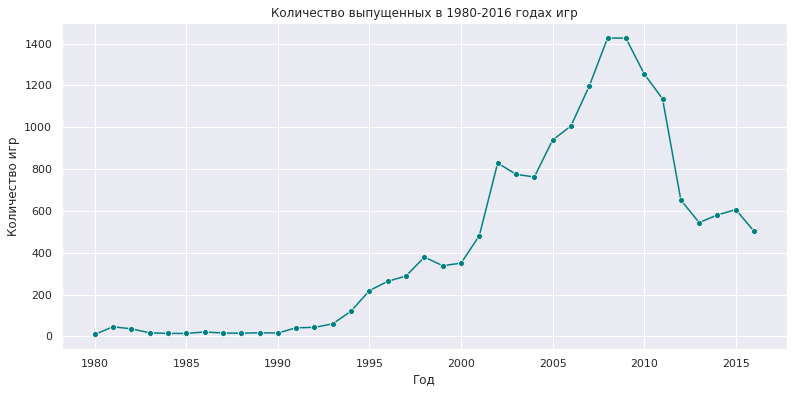

In [26]:
plt.figure(figsize=(13, 6))

sns.lineplot(data=data.pivot_table(index='year_of_release', values='name', aggfunc='count'), 
             x='year_of_release', 
             y='name',
             color='teal',
             marker='o')

plt.title('Количество выпущенных в 1980-2016 годах игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

С 1993 по 2008 годы отмечается рост количества выпускаемых игр, наибольшее количество в 2008 и 2009, с дальнейшим снижением. До 1995 года выпускалось менее 200 игр в год, предположу, что данные до 1995 года не важны.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.**

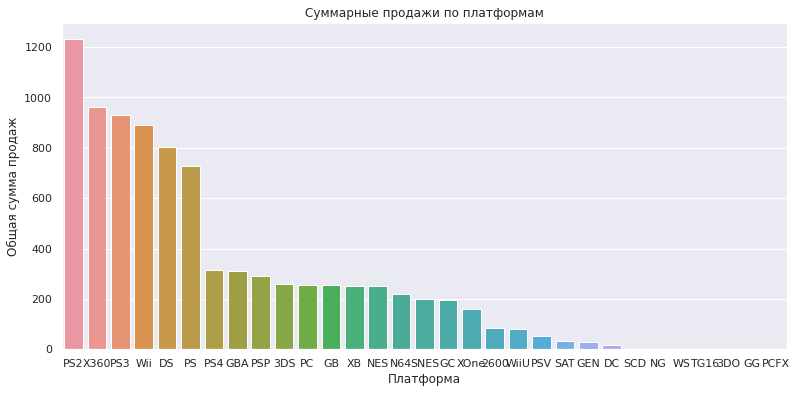

In [27]:
pl_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=pl_sales.index, y=pl_sales)
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общая сумма продаж')
plt.show()

In [28]:
top_6_pl = list(pl_sales.index[:6]) # выбрал платформы с наибольшими суммарными продажами
top_6_pl

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

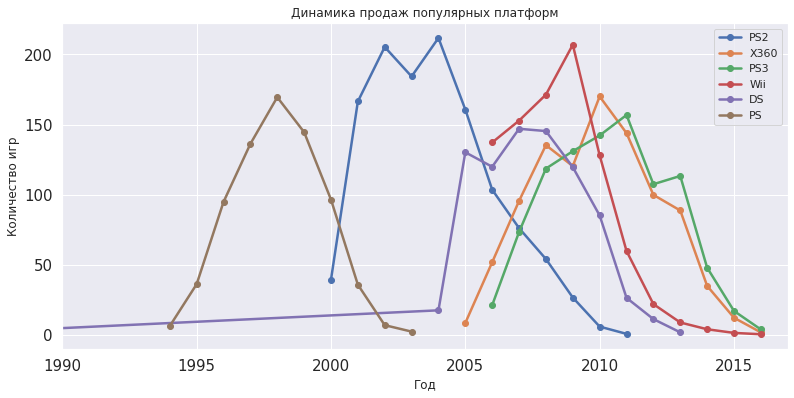

In [29]:
# построил графики продаж для наиболее популярных платформ
for top in top_6_pl:
    (
        data.loc[data['platform'] == top]
        .groupby('year_of_release')['total_sales']
        .sum()
        .plot(figsize=(13, 6), style='o-', kind='line', fontsize=15, linewidth=2.5, legend=True)
    )
    
plt.title('Динамика продаж популярных платформ')
plt.xlabel('Год')
plt.xlim(1990, 2017)
plt.ylabel('Количество игр')
plt.legend(top_6_pl)
plt.show()

**По графику видно, что в данных по платформе DS, имеется ошибка (платформа вышла в 2004 году, а не в 1985, https://ru.wikipedia.org/wiki/Nintendo_DS).**

In [30]:
data.loc[(data['platform'] == "DS") & (data['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,unknown,0.02


**Игра Strongest Tokyo University Shogi вышла в 1985, возможно она была адаптирована для DS либо в данных есть ошибка. С учетом отсутствия сведений о продажах (кроме незначительных в Японии), оценок и рейтинга можно удалить строку.**

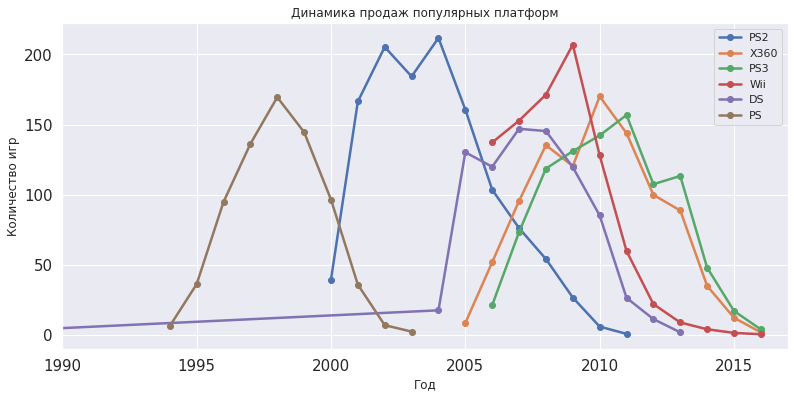

In [31]:
data = data.drop(15719).reset_index(drop=True)

for top in top_6_pl: # теперь все правильно
    (
        data.loc[data['platform'] == top]
        .groupby('year_of_release')['total_sales']
        .sum()
        .plot(figsize=(13, 6), style='o-', kind='line', fontsize=15, linewidth=2.5, legend=True)
    )
    
plt.title('Динамика продаж популярных платформ')
plt.xlabel('Год')
plt.xlim(1990, 2017)
plt.ylabel('Количество игр')
plt.legend(top_6_pl)
plt.show()

Платформы PS (до выхода каждой новой версии) существуют 6 лет, при этом продаются игры для каждой из них на протяжении 10 лет. Примерно в одно время продавались игры для DS, X360, Wii, также в течение 10 лет. Далее посмотрим срок существования платформ в разрезе производителей PS и XBOX (без учета портативных платформ).

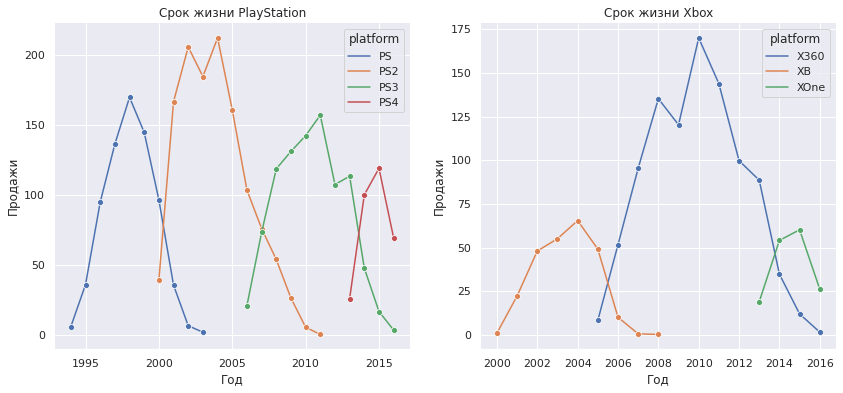

In [32]:
ps = pd.DataFrame(data.query('platform in ["PS", "PS2", "PS3", "PS4"]'))
xb = pd.DataFrame(data.query('platform in ["X360", "XB", "XOne"]'))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.despine(left=True)

sns.lineplot(x='year_of_release',y='total_sales', hue='platform',
             data=ps.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index(), 
             marker='o', ax=axes[0]).set(title="Срок жизни PlayStation", xlabel='Год', ylabel='Продажи')

sns.lineplot(x='year_of_release',y='total_sales', hue='platform', 
             data=xb.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index(), 
             marker='o', ax=axes[1]).set(title="Срок жизни Xbox", xlabel='Год', ylabel='Продажи')
fig.show()

In [33]:
# периодичность выхода платформ 
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
time_life['life'].median()

7.0

**Возьмем данные за актуальный период, с 2013 года. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [34]:
# сформировал таблицу за интересующий период
act_data = data.query('year_of_release >= 2013').reset_index(drop=True)
act_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 213.8+ KB


**Определим какие платформы лидируют по продажам, растут/падают. Выберем несколько потенциально прибыльных платформ.**

In [35]:
# вывел продажи платформ за период 2013-2016 годов
act_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').T

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


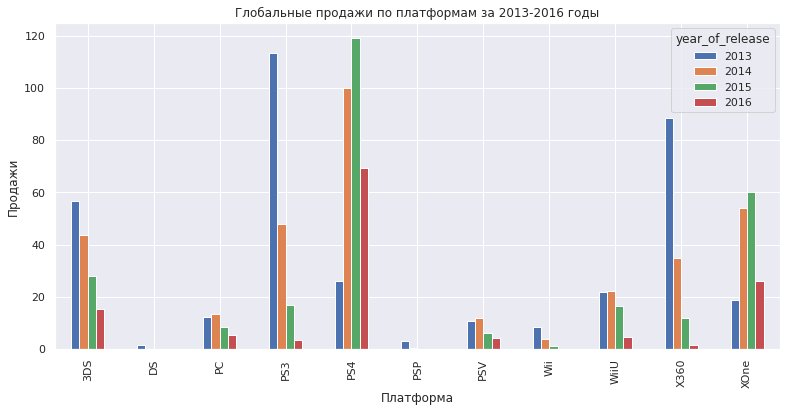

In [36]:
# построил график глобальных продаж по платформам за 2013-2016 годы
(
    act_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(13, 6))
) 
plt.title('Глобальные продажи по платформам за 2013-2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По глобальным продажам в актуальный период лидируют платформы PS3, PS4, X360, XOne, 3DS.

In [37]:
# вывел совокупные глобальные продажи по платформам
act_data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False).T

platform,PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP,DS
total_sales,314.14,181.43,159.32,143.25,136.8,64.63,39.43,32.99,13.66,3.5,1.54


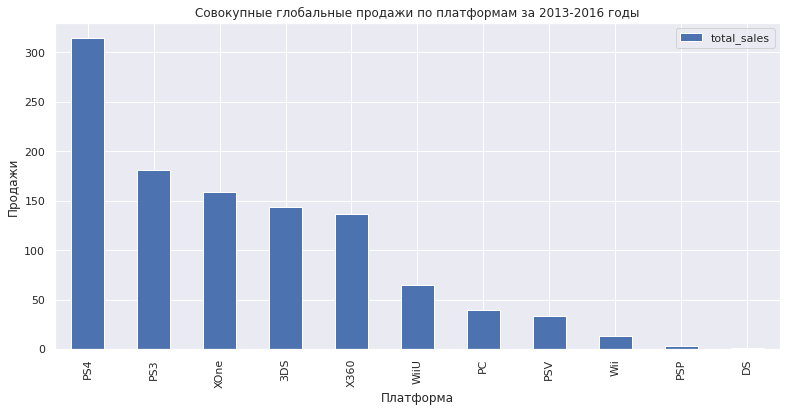

In [38]:
# построил график совокупных глобальных продаж по платформам за 2013-2016 годы
(
    act_data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(13, 6))
)
plt.title('Совокупные глобальные продажи по платформам за 2013-2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

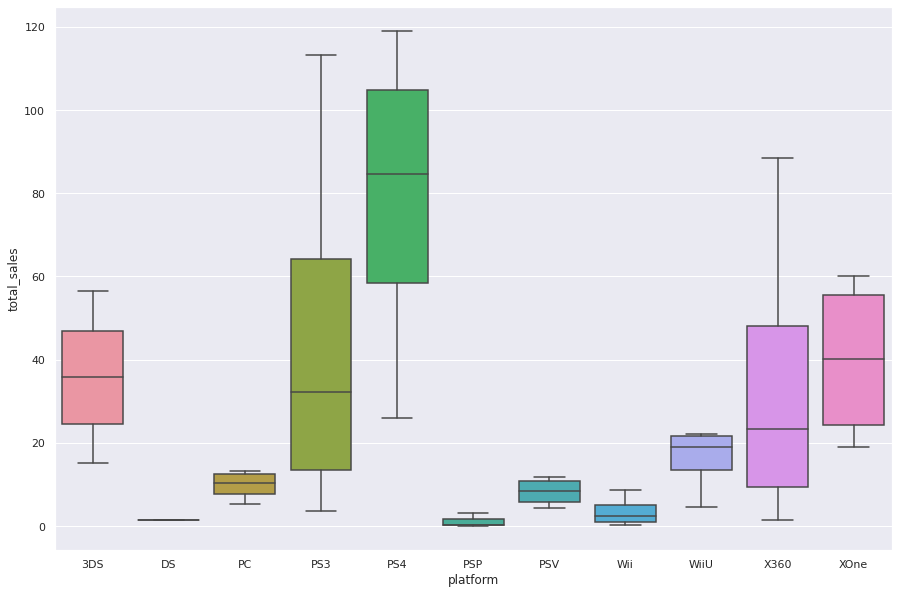

In [39]:
# построил график boxpolot по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', 
            y='total_sales', 
            data=act_data.pivot_table(index=['platform','year_of_release'], 
                                      values='total_sales', aggfunc = 'sum').reset_index()
           )
fig.show()

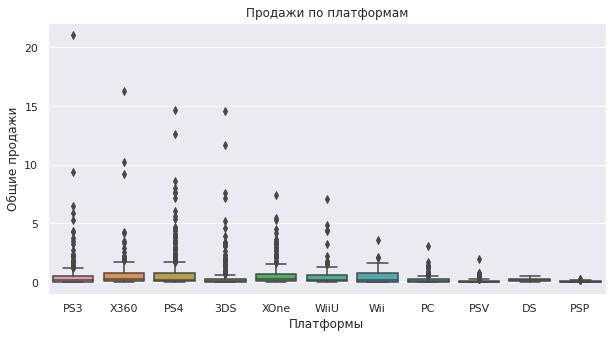

In [40]:
plt.figure(figsize=(10, 5))
(
    sns.boxplot(x='platform', y='total_sales', data=act_data)
    .set(title='Продажи по платформам', xlabel='Платформы', ylabel='Общие продажи')
)
fig.show()

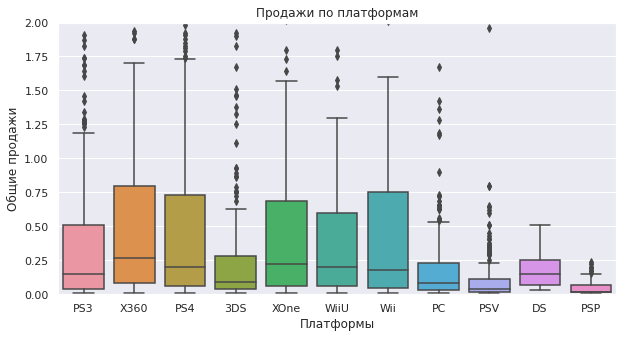

In [41]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 2)
(
    sns.boxplot(x='platform', y='total_sales', data=act_data)
    .set(title='Продажи по платформам', xlabel='Платформы', ylabel='Общие продажи')
)
fig.show()

На графиках есть выбросы, которые указывают на очень успешные игры. Наиболее высокие медианные продажи у Xbox, Wii, Playstation.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. <br>
Интерпретация диаграмм размаха - прибыльность выше у платформы, которая:
- Имеет более высокую медиану и компактный межквартильный размах (стабильные и предсказуемые продажи).
- Обладает верхними выбросами (хиты компенсируют риски).
- Имеет минимальное количество нижних выбросов (меньше провальных проектов).
    
В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно. 
</font>
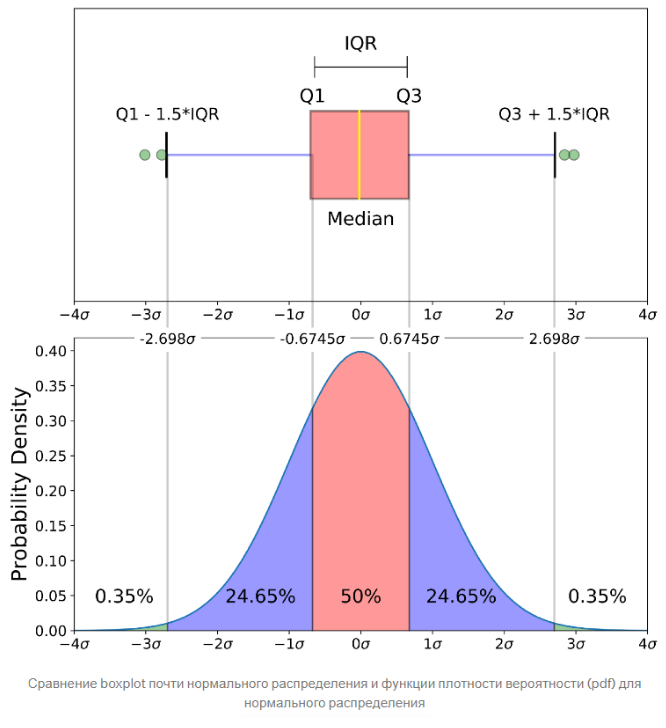

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

In [42]:
# влияние отзывов на продажи внутри платформы
ps4 = act_data.query('platform == "PS4"') # взял в качестве популярной платформы PS4
ps4 = ps4.loc[:,['total_sales', 'critic_score', 'user_score']]
ps4.name = 'PS4'

# определил функцию для вывода heatmap матрицы корреляции, диаграмм рассеяния
def show_sales_on_scores(data): 
    mask = np.triu(np.ones_like(data.loc[:, ['total_sales', 'critic_score', 'user_score']].corr(), dtype=bool)) 
    f, ax = plt.subplots(figsize=(7, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(data.loc[:, ['total_sales', 'critic_score', 'user_score']].corr(), 
                mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5}).set(title=data.name) 
    
    scores = ['critic_score', 'user_score']
    columns, count = len(scores), 0
    
    fig, axes = plt.subplots(1, columns, figsize=(13, 6))
    
    for i in range(columns):
        xlabels = ['Отзывы критиков', 'Отзывы пользователей']
        (
            sns.scatterplot(data=data, x=scores[count], y=data['total_sales'], ax=axes[i])
            .set(title=data.name, xlabel=xlabels[i], ylabel='Глобальные продажи')
        )
        count += 1

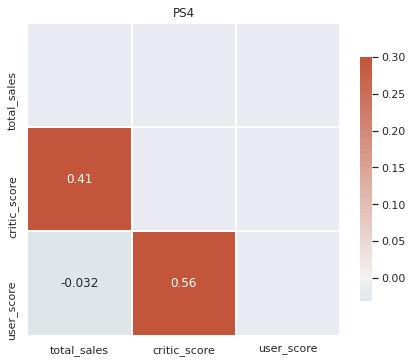

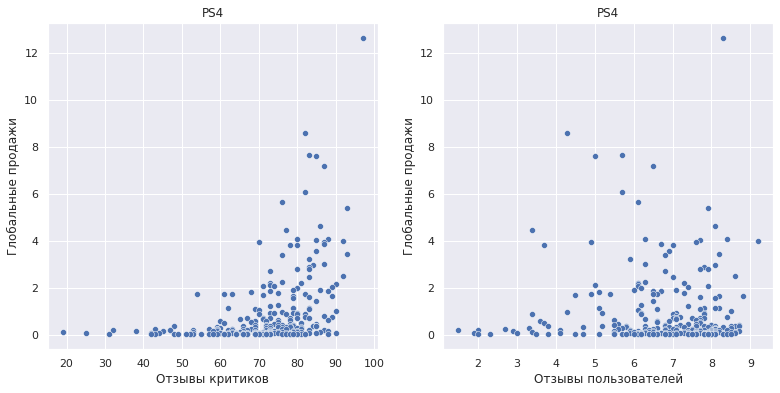

In [43]:
show_sales_on_scores(ps4)

Можно отметить корреляцию между оценками критиков и продажами. Зависимость от оценок пользователей - отсутствует.

**Соотнесем выводы с продажами игр на других платформах.**

In [44]:
# соотнес выводы с XOne и PC
xone = act_data.query('platform == "XOne"')
xone = ps4.loc[:,['total_sales', 'critic_score', 'user_score']]
xone.name = 'XOne'
pc = act_data.query('platform == "PC"')
pc = pc.loc[:,['total_sales', 'critic_score', 'user_score']]
pc.name = 'PC'

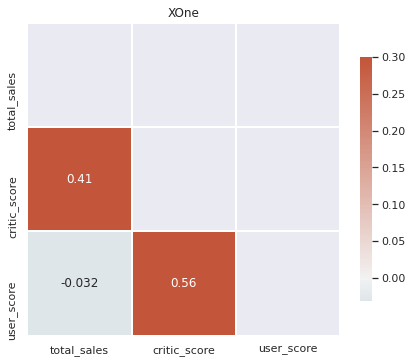

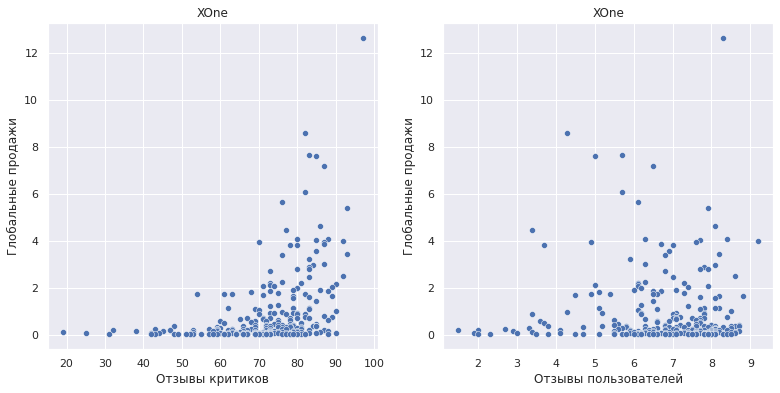

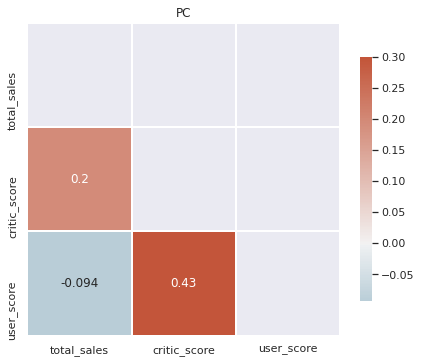

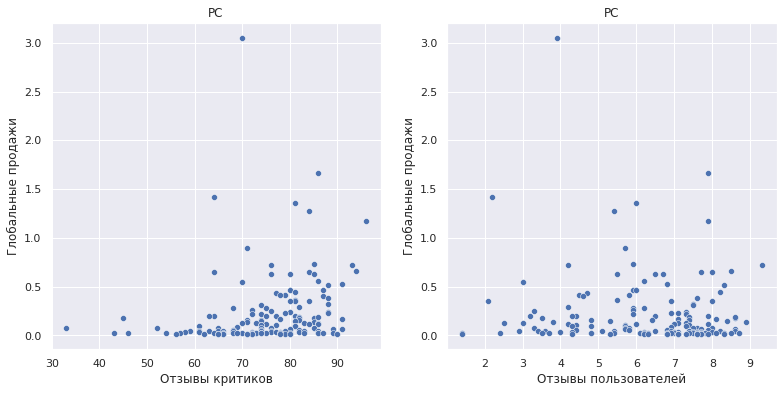

In [45]:
show_sales_on_scores(xone)
show_sales_on_scores(pc)

По другим платформам выводы (в отношении PS4) о влиянии отзывов на продажи подтверждаются.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
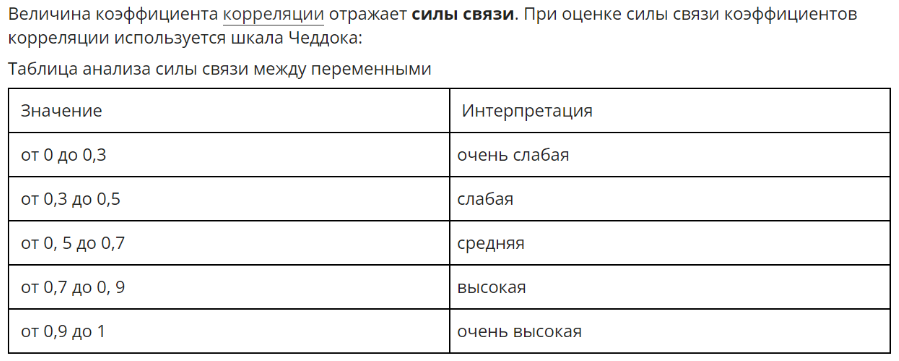

**Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльные жанры.**

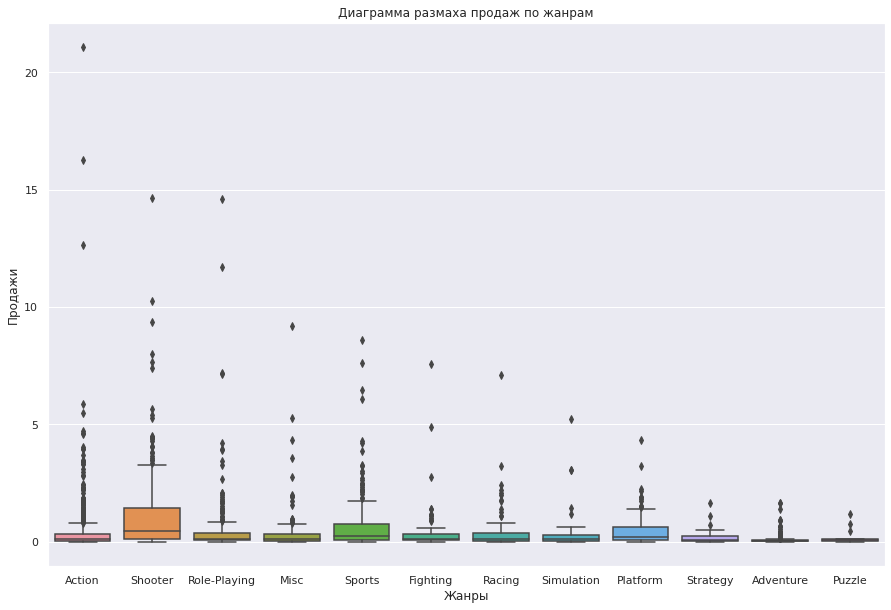

In [48]:
plt.figure(figsize=(15, 10))
(
    sns.boxplot(x='genre', y='total_sales', data=act_data)
    .set(title='Диаграмма размаха продаж по жанрам', xlabel='Жанры', ylabel='Продажи')
)
fig.show()

In [49]:
act_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Наиболее прибыльные жанры - Shooter, Sports, Platform.

На шаге 3 установлено, что с 1993 по 2008 год количество выпускаемых игр растет и достигает пика в 2008-2009 годах, далее - снижение. Наибольшие суммарные продажи за весь период (с 1980 года) у PS2, X360, PS3, Wii, DS, PS. Платформы существуют 6 лет, при этом игры продаются на протяжении 10 лет.

Для целей исследования взят период с 2013 года. В этот период по глобальным продажам лидируют платформы PS3, PS4, X360, XOne, 3DS. Наиболее прибыльные платформы: PS4 и PS3, X360 и Xone. Медианные продажи новых платформ (PS4, XOne) выше, чем у других.

Можно отметить корреляцию между оценками критиков и продажами внутри платформ. Зависимость от оценок пользователей - отсутствует.

Самые прибыльные жанры - Shooter, Sports, Platform.

#### Составим портрет пользователя каждого региона

In [50]:
# определил функцию для построения графиков
def show_regions(column):
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    columns, count = len(regions), 0
    
    fig, axes = plt.subplots(1, columns, figsize=(18,5))
    
    for i in range(columns):
            df = act_data.pivot_table(index=column, values = regions[count], aggfunc = 'sum').nlargest(5, regions[count])
            title_dict = {'na_sales': 'Продажи в Северной Америке',
                          'eu_sales': 'Продажи в Европе',
                          'jp_sales': 'Продажи в Японии'}
            plot = df.plot(kind='bar', title=title_dict[regions[count]], xlabel='Платформа', ylabel='Продажи', 
                           ax=axes[i], fontsize=13, rot=45)
            count += 1

**Определим самые популярные платформы (топ-5). Опишем различия в долях продаж.**

'Самые популярные платформы'

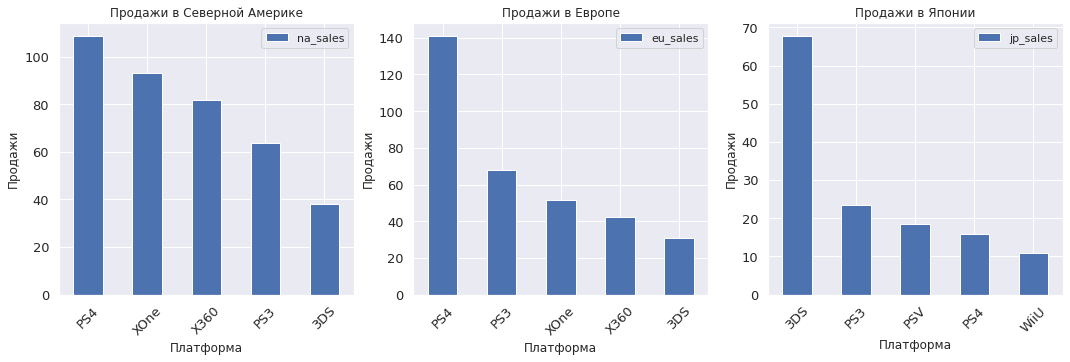

In [51]:
display('Самые популярные платформы')
show_regions('platform')

PS4 топовая платформа в Северной Америке и Европе, 3DS - в Японии. При этом доля продаж для платформы 3DS составляет 13,1%, а для продаж в Японии в целом - 12,9%. Можно отметить принципальные отличия между предпочтениями пользователей игровых платформ в Японии от американских и европейских, разные позиции Xbox в Америке и Европе, долю продаж PS4 относительно других производителей в Европе.

In [52]:
# посчитал процент продаж для платформы 3DS и для Японии в целом
display('Процент продаж платформы 3DS:', (act_data.query('platform == "3DS"')['total_sales'].sum() / act_data['total_sales'].sum()) * 100, 
       'Процент продаж в Японии:', (act_data['jp_sales'].sum() / act_data['total_sales'].sum()) * 100)

'Процент продаж платформы 3DS:'

13.133887722450924

'Процент продаж в Японии:'

12.90742557463624

**Определим самые популярные жанры (топ-5).**

'Самые популярные жанры'

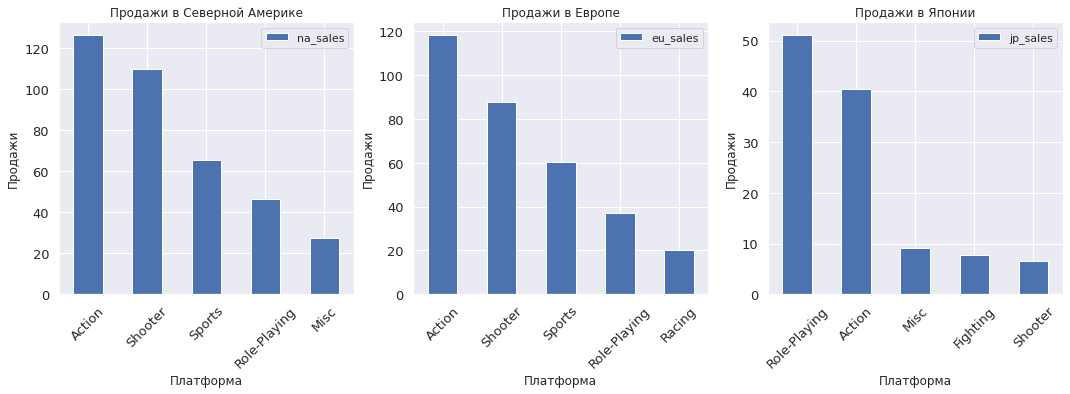

In [53]:
display('Самые популярные жанры')
show_regions('genre')

Так же видна специфика Японии. В целом предочтения в Америке и Европе аналогичны.

**Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе.**

'Влияние рейтинга ESRB на продажи в регионах'

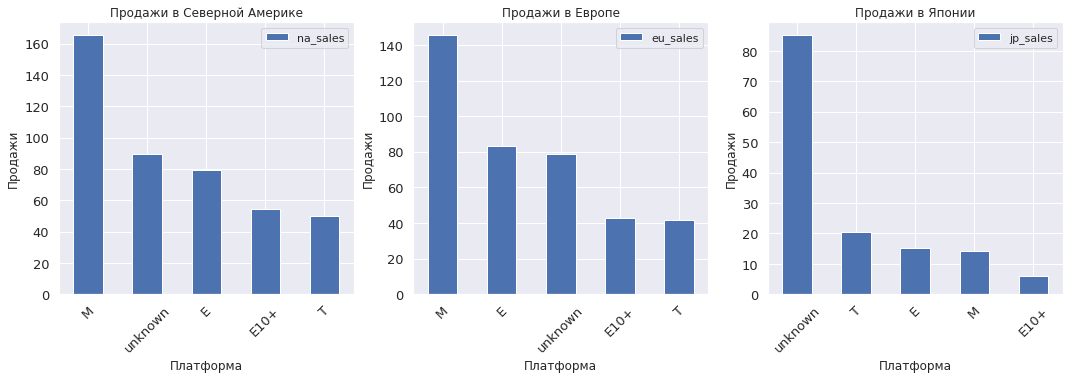

In [54]:
display('Влияние рейтинга ESRB на продажи в регионах')
show_regions('rating')

Тут сразу нашлись ответы насчет пропусков в рейтинге. Японцы много играют в свои игры, которым присваивается другой рейтинг -  CERO, и не присваивается ESRB. Эти игры кроме Японии больше нигде не продаются и их много. Рейтинговые показатели в Америке и Европе схожи.

In [55]:
# количество исключительно японских игр, которым не присваивался рейтинг ESRB
len(data.query('na_sales == 0 & eu_sales == 0 & jp_sales != 0 & rating == "unknown"')) 

3230

**PS4 топовая платформа в Северной Америке и Европе, 3DS - в Японии. Как и во всём в Японии своя специфика. В целом предочтения в Америке и Европе аналогичны.**

#### Проверим гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Уровень статистической значимости alpha в 0.05.

In [56]:
xbox_user_score = act_data.query('platform == "XOne"')['user_score']
pc_user_score = act_data.query('platform == "PC"')['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_user_score, pc_user_score, nan_policy='omit', equal_var=True)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


Значимых отличий в пользовательских рейтингах XOne и PC не имеется при alpha = 0,05. Не отвергаем нулевую гипотезу.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

Уровень статистической значимости alpha в 0.05.

In [57]:
xbox_user_score = act_data.query('genre == "Action"')['user_score']
pc_user_score = act_data.query('genre == "Sports"')['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_user_score, pc_user_score, nan_policy='omit', equal_var=True)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.0517832389139422e-27
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о равенстве средних рейтингов игр Action и Sports, поскольку p-value очень мало.

**Статистически значимых отличий в средних пользовательских рейтингах XOne и PC не имеется, при этом средние пользовательские рейтинги игр Action и Sports не равны.**

Гипотезы сформулированы следующим образом.

В соответствии с нулевой гипотезой различия отсутствуют (пользовательские средние рейтинги платформ XOne и PC, жанры Action и Sports). Альтернативная гипотеза предполагает, что средние рейтинги в данном случае не равны.

Применен t-критерий Стьюдента для независимых выборок, так как сравниваются средние значения независимых групп. Также предполагается, что данные распределены нормально. Данным тестом определено наличие статистических значимых различий между средними значениями двух групп.

#### Общий вывод

**В ходе предобработки данных заменены наименования столбцов на корректные, удалены дубликаты, обработаны пропуски, добавлен столбцец total_sales с глобальными продажами.**

**С 1993 по 2008 год количество выпускаемых игр растет и достигает пика в 2008-2009 годах, далее - снижение. Наибольшие суммарные продажи за весь период (с 1980 года) у PS2, X360, PS3, Wii, DS, PS. Платформы существуют 6 лет, при этом игры продаются на протяжении 10 лет.**

**Для целей исследования взят период с 2013 года. В этот период по глобальным продажам лидируют платформы PS3, PS4, X360, XOne, 3DS. Наиболее прибыльные платформы: PS4 и PS3, X360 и Xone. Медианные продажи новых платформ (PS4, XOne) выше, чем у других.
Можно отметить корреляцию между оценками критиков и продажами внутри платформ. Зависимость от оценок пользователей - отсутствует.Самые прибыльные жанры - Action, Shooter, Sports, RPG.**

**PS4 топовая платформа в Северной Америке и Европе, 3DS - в Японии. Можно отметить принципальные отличия между предпочтениями пользователей игровых платформ в Японии от американских и европейских, разные позиции Xbox в Америке и Европе, долю продаж PS4 относительно других производителей в Европе. Рейтинговые показатели в Америке и Европе схожи.**

**По результатам проверки гипотезы не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов Xbox и PC; гипотеза о равенстве средних рейтингов игр Action и Sports не нашла своего подтверждения.** 

**Рекомендации:**

**С учетом результатов исследования, возможно стоит, сосредоточить усилия на рынках Северной Америки и Европы, играх жанров Action, Shooter, Sports, RPG для платформ PlayStation и Xbox.**

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Алексей! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
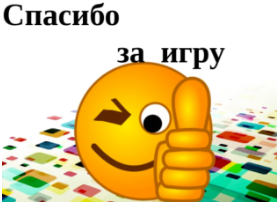